In [1]:
from common_utils import (
    fix_randomness,
    generate_experiment1a_blobs,
    generate_experiment1b_blobs,
    plot_blob_data,
    z_scale_np_array
)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 42
fix_randomness(seed)

# Experiment 1A: Hand picked samples

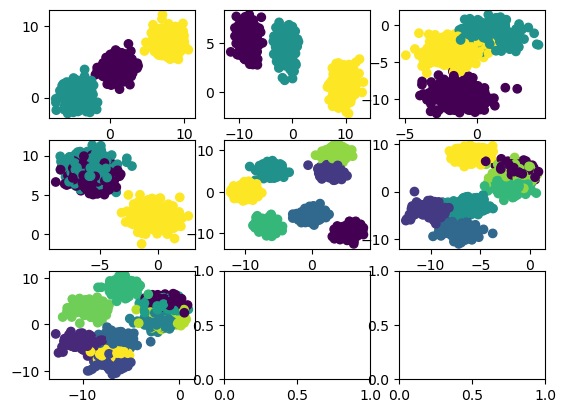

In [2]:
# Blobs for Experiment 1a
# First 3 blobs have 3 clusters
# Last 3 blobs have 7 clusters
blobs_1a = generate_experiment1a_blobs()
plot_blob_data(blobs_1a)

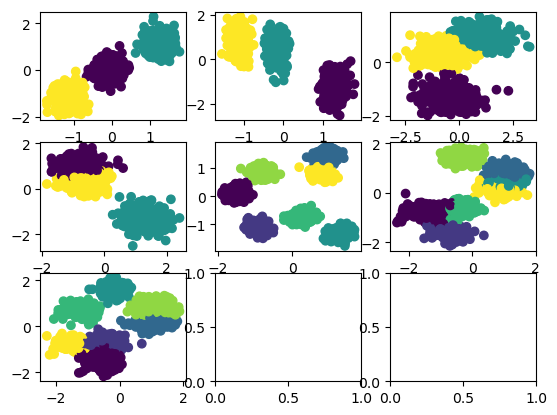

In [3]:
blobs_1a_with_predictions = list()
cluster_counts = [3,3,3,3,7,7,7]
counter =0
for blob in blobs_1a:
    aggC = AgglomerativeClustering(n_clusters= cluster_counts[counter], linkage="ward")
    counter += 1
    blobs_1a_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(blobs_1a_with_predictions)

In [4]:
sample_sizes = [128, 256, 512, 1024, 2048, 4096]
cluster_counts = [4, 8, 16, 32, 64, 128]
n = 100

ss_blob_dict, cc_blob_dict = generate_experiment1b_blobs(
    seed,
    sample_sizes,
    cluster_counts,
    n
)

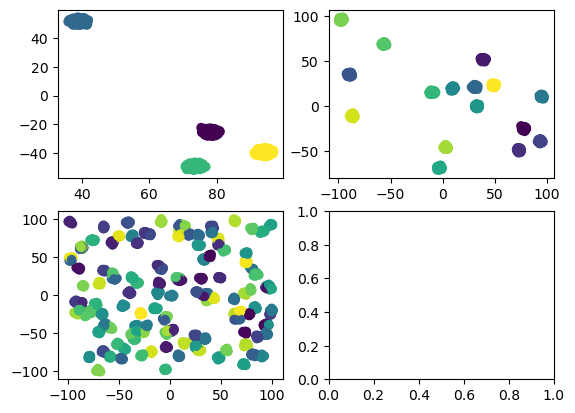

In [5]:
# Lets' take a plot of the representatives so that we have an idea of what's being generated
representative_blob_list_cc = [
    cc_blob_dict[4][0], cc_blob_dict[16][0], cc_blob_dict[128][0],
]
plot_blob_data(representative_blob_list_cc)

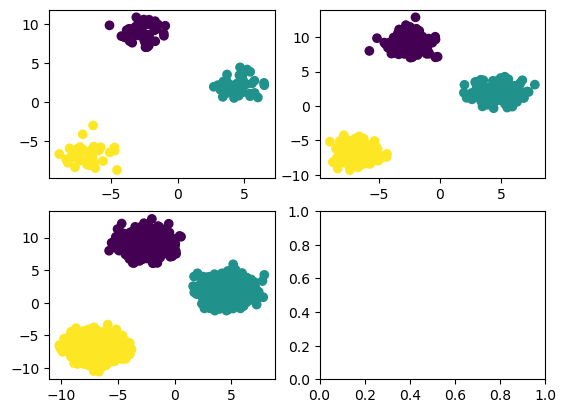

In [6]:
representative_blob_list_ss_3 = [
    ss_blob_dict[128][0], ss_blob_dict[512][0], ss_blob_dict[4096][0],
]
plot_blob_data(representative_blob_list_ss_3)

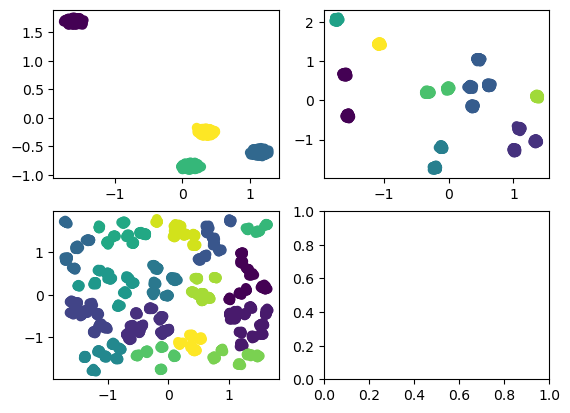

In [7]:
# See how these representatives are clustered
respresentative_with_predictions = list()
counter = 0
for blob in representative_blob_list_cc:
    # 4,8,16
    aggC = AgglomerativeClustering(n_clusters= cluster_counts[counter], linkage="ward")
    counter += 1
    respresentative_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(respresentative_with_predictions)

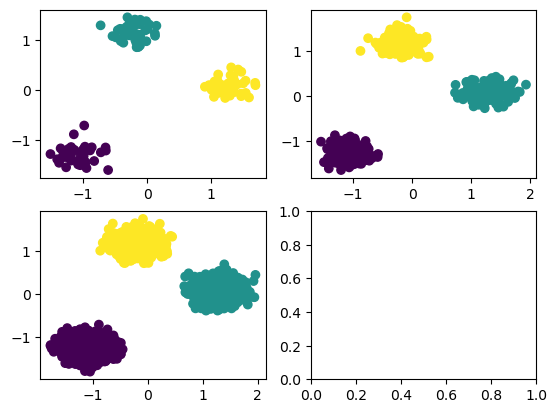

In [8]:
respresentative_with_predictions = list()
counter = 0
for blob in representative_blob_list_ss_3:
    # 3
    aggC = AgglomerativeClustering(n_clusters= 3, linkage="ward") # can be change
    counter += 1
    respresentative_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(respresentative_with_predictions)

# Experiment 1B: Evaluating average performance

0.900147890521901
0.6957345856768208


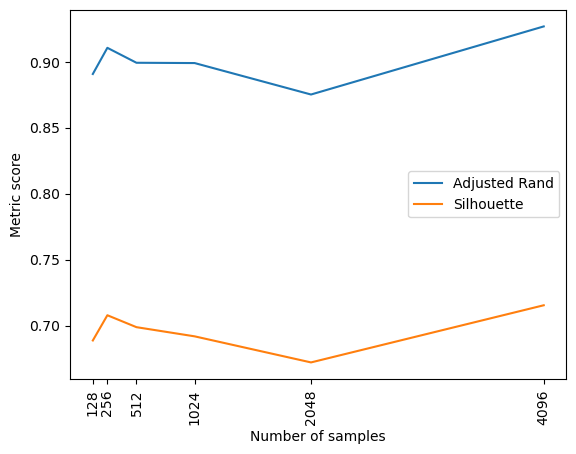

In [9]:
ss_ar_scores = list()
ss_sil_scores = list()
ss_average_times = list()
counter = 0
for ss in sample_sizes:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in ss_blob_dict[ss]:
        start_time = time()
        aggC = AgglomerativeClustering(n_clusters= 3, linkage="ward") # can be any linkage honestly
        pred = aggC.fit_predict(z_scale_np_array(blob[0]))
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    ss_ar_scores.append(average_adjusted_rand)
    ss_sil_scores.append(average_sil)
    ss_average_times.append(average_time)
    counter +=1

ss_overall_average_ar = sum(ss_ar_scores)/len(sample_sizes)
print(ss_overall_average_ar)

ss_overall_average_sil = sum(ss_sil_scores)/len(sample_sizes)
print(ss_overall_average_sil)

plt.xlabel("Number of samples")
plt.ylabel("Metric score")

plt.plot(sample_sizes, ss_ar_scores, label="Adjusted Rand")
plt.plot(sample_sizes, ss_sil_scores, label="Silhouette")

plt.xticks(sample_sizes, rotation=90)

plt.legend()
plt.show()
# No apparent pattern for different sample sizes

0.9856061771856828
0.8672930549848967


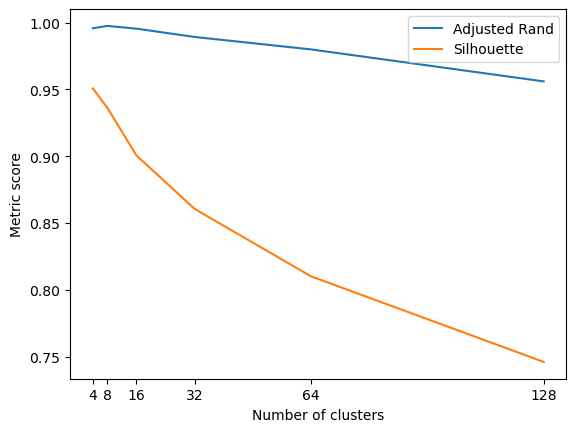

In [10]:
cc_ar_scores = list()
cc_sil_scores = list()
cc_average_times = list()
counter = 0
for cc in cluster_counts:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in cc_blob_dict[cc]: # 1 cluster size have 100 samples
        start_time = time()
        aggC = AgglomerativeClustering(n_clusters= cc, linkage="ward") # can be any linkage honestly
        pred = aggC.fit_predict(z_scale_np_array(blob[0]))
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    cc_ar_scores.append(average_adjusted_rand)
    cc_sil_scores.append(average_sil)
    cc_average_times.append(average_time)
    counter +=1

cc_overall_average_ar = sum(cc_ar_scores)/len(sample_sizes)
print(cc_overall_average_ar)

cc_overall_average_sil = sum(cc_sil_scores)/len(sample_sizes)
print(cc_overall_average_sil)

plt.xlabel("Number of clusters")
plt.ylabel("Metric score")

plt.plot(cluster_counts, cc_ar_scores, label="Adjusted Rand")
plt.plot(cluster_counts, cc_sil_scores, label="Silhouette")

plt.xticks(cluster_counts)

plt.legend()
plt.show()

In [11]:
aggC_average_ar = (cc_overall_average_ar + ss_overall_average_ar)/2
aggC_average_sil = (cc_overall_average_sil + ss_overall_average_sil)/2
aggC_average_ar, aggC_average_sil

(0.942877033853792, 0.7815138203308587)

# Experiment 2: Determining algorithm complexity with respect to number of samples and number of clusters

([<matplotlib.axis.XTick at 0x1f24cb7fed0>,
 [Text(128, 0, '128'),
  Text(256, 0, '256'),
  Text(512, 0, '512'),
  Text(1024, 0, '1024'),
  Text(2048, 0, '2048'),
  Text(4096, 0, '4096')])

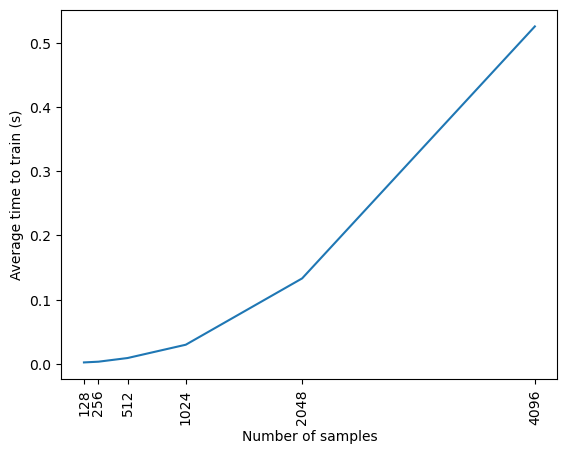

In [12]:
plt.xlabel("Number of samples")
plt.ylabel("Average time to train (s)")

plt.plot(sample_sizes, ss_average_times)
plt.xticks(sample_sizes, rotation=90)
# Possibly O(n^2) complexity

([<matplotlib.axis.XTick at 0x1f24c9f2e50>,
 [Text(4, 0, '4'),
  Text(8, 0, '8'),
  Text(16, 0, '16'),
  Text(32, 0, '32'),
  Text(64, 0, '64'),
  Text(128, 0, '128')])

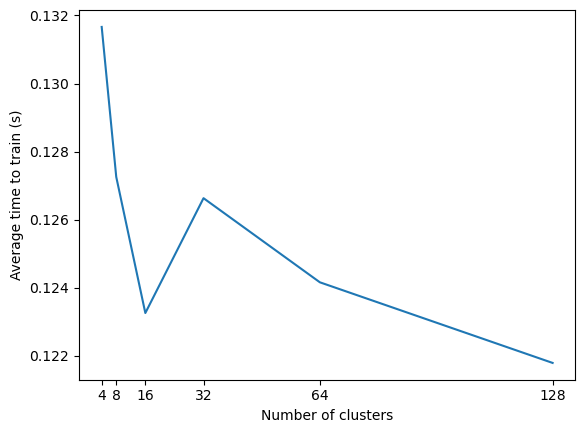

In [13]:
plt.xlabel("Number of clusters")
plt.ylabel("Average time to train (s)")
plt.plot(cluster_counts, cc_average_times)
plt.xticks(cluster_counts)
# Complexity is not apparent, plateau at around 20 clusters

# Experiment 3A: Real world problems

The datasets that we will be using shows a combination of all/some of these traits
- Non-linearly separable
- Noise points
- Varying cluster density
- Overlapping of clusters

## Worms
It's a plot with an exterme amount of noise points. I'm guessing it would be difficult for the clustering algorithms to determine the clusters. It has 1 million rows, so training might take a while.

In [3]:
worms_df = pd.read_csv("./data/worms/worms_2d.txt", sep=" ", header=None)
worms_df

,0,1
0,4260.1,3476.0
1,4276.3,3475.6
2,4260.2,3475.3
3,4244.4,3494.8
4,4270.0,3467.1
...,...,...
105595,3567.9,3583.4
105596,3383.9,3897.8
105597,3259.6,2970.7
105598,2688.7,2958.6


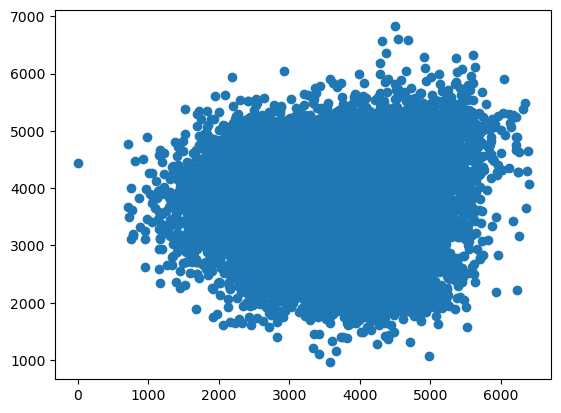

In [4]:
worms_arr = worms_df.to_numpy()
worms_arr_scaled = z_scale_np_array(worms_arr)
xs, ys = zip(*worms_arr)
plt.scatter(xs, ys)
# I can barely make out any clusters

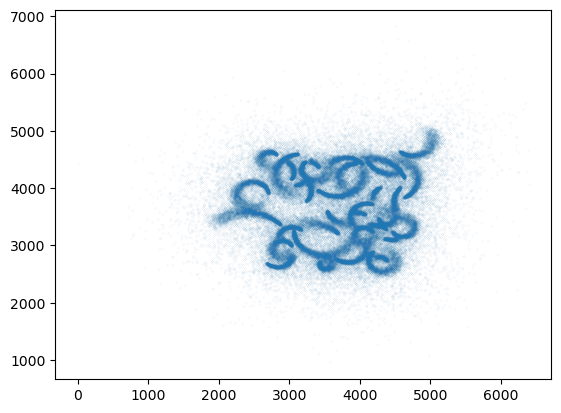

In [5]:
# Reduce the size of the points
plt.scatter(xs, ys, s=0.001)

In [36]:
def aggClus_tuning_with_cdbw(X, X_scaled, cluster_sizes, n_neighbours):
    from cdbw import CDbw
    pred_w_score = list()
    linkages = ['ward', 'complete', 'average', 'single']
    metrics = ["euclidean","cosine", "manhattan"]
    from sklearn.neighbors import kneighbors_graph

    
    for i in n_neighbours:
        knn_graph = kneighbors_graph(X_scaled, i, include_self=False)
        for n_cluster in cluster_sizes:
            for linkage in linkages:
                for metric in metrics:
                    if linkage == "ward" and metric != "euclidean":
                        continue
                    aggClust1 = AgglomerativeClustering(
                        n_clusters= n_cluster, 
                        linkage=linkage, 
                        metric=metric,
                        #connectivity = knn_graph,
                    )
                    X_predictions = aggClust1.fit_predict(X_scaled)
                    cdbw_score = CDbw(X, X_predictions)
                    pred_w_score.append((cdbw_score, X_predictions, n_cluster, linkage, metric, i))
    
    maxi = max(pred_w_score, key = lambda x: x[0])
    ans_dict = {
        "cdbw_score":maxi[0],
        "n_cluster":maxi[2],
        "linkage":maxi[3],
        "metric":maxi[4],
        "n_neighbours":maxi[5]
    }
    return ans_dict, maxi[1]

# T48K

Non linearly separable data set with some noise points

In [15]:
t48k_df = pd.read_csv("./data/t48k.txt", sep=" ")
t48k_df

,8000,2
0,68.601997,102.491997
1,454.665985,264.808990
2,101.283997,169.285995
3,372.614990,263.140991
4,300.989014,46.555000
...,...,...
7995,442.420990,303.721985
7996,495.451996,288.502991
7997,267.605011,141.725006
7998,238.358002,252.729996


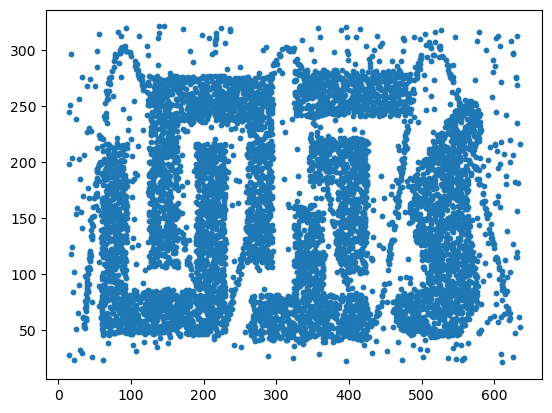

In [16]:
t48k_arr = t48k_df.to_numpy()
t48k_arr_scaled = z_scale_np_array(t48k_arr)
xs, ys = zip(*t48k_arr)
plt.scatter(xs, ys, s=10)

In [18]:
cluster_sizes = [2,4,8,16]
n_neighbours = [10,20,30,40]
tmp, pred = aggClus_tuning_with_cdbw(t48k_arr, t48k_arr_scaled, cluster_sizes,n_neighbours)
print(tmp)

{'cdbw_score': 0.009209397054950419, 'n_cluster': 2, 'linkage': 'single', 'metric': 'euclidean', 'n_neighbours': 10}


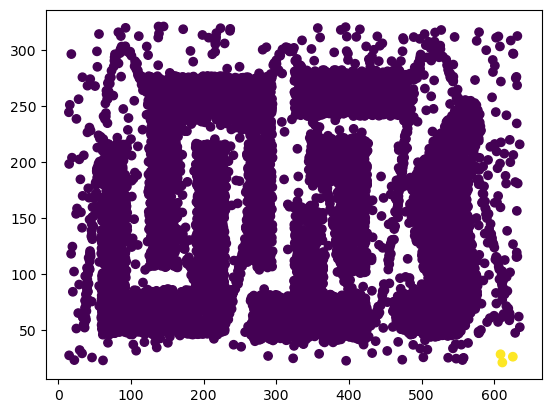

In [19]:
plt.scatter(x = t48k_arr[:,0], y= t48k_arr[:,1], c = pred)

# Jain

Differing cluster density

In [20]:
jain_df = pd.read_csv("./data/jain.txt", sep="\t", header=None)
jain_df

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


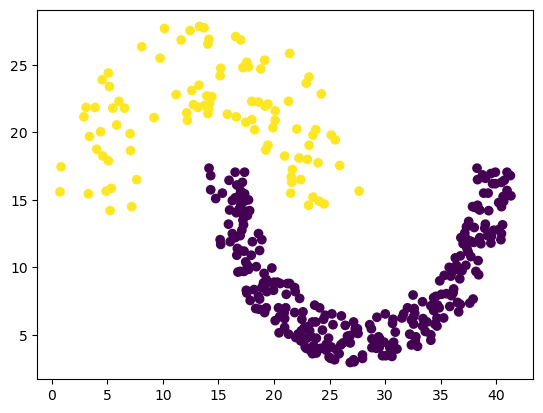

In [21]:
jain_arr = jain_df.to_numpy()
jain_arr_scaled = z_scale_np_array(jain_arr)
xs, ys, cs = zip(*jain_arr)
plt.scatter(xs, ys, c=cs)

In [22]:
cluster_sizes = [2,4,8,16]
n_neighbours = [10,20,30,40]
tmp, pred = aggClus_tuning_with_cdbw(jain_arr[:,:2], jain_arr_scaled[:,:2], cluster_sizes,n_neighbours)
print(tmp)

{'cdbw_score': 0.1480729702177472, 'n_cluster': 16, 'linkage': 'ward', 'metric': 'euclidean', 'n_neighbours': 10}


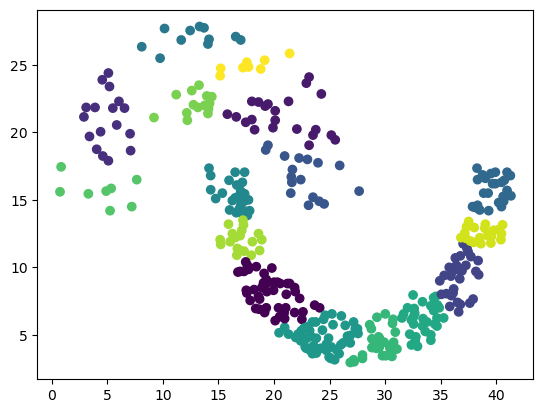

In [23]:
plt.scatter(x = jain_arr[:,0], y= jain_arr[:,1], c = pred)

# Path-based

Non-linearly separable and several clusters are inside one cluster

In [24]:
pathbased_df = pd.read_csv("./data/pathbased.txt", sep="\t", header=None)
pathbased_df

,0,1,2
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
...,...,...,...
295,17.50,18.05,2
296,16.65,17.50,2
297,15.45,17.30,2
298,15.45,17.80,2


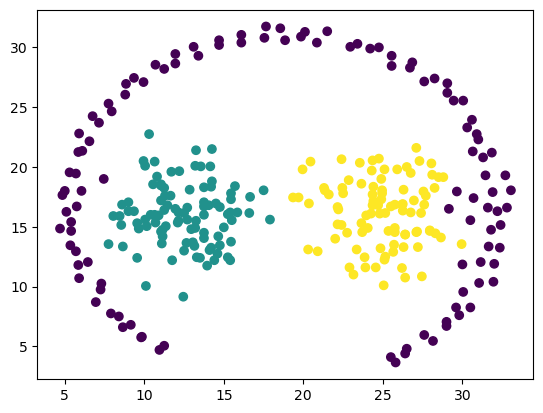

In [25]:
pathbased_arr = pathbased_df.to_numpy()
pathbased_arr_scaled = z_scale_np_array(pathbased_arr)
xs, ys, cs = zip(*pathbased_arr)
plt.scatter(xs, ys, c=cs)

In [26]:
cluster_sizes = [2,4,8,16]
n_neighbours = [10,20,30,40]
tmp, pred = aggClus_tuning_with_cdbw(pathbased_arr[:,:2], pathbased_arr_scaled[:,:2], cluster_sizes ,n_neighbours)
print(tmp)

{'cdbw_score': 0.10610762550520596, 'n_cluster': 16, 'linkage': 'ward', 'metric': 'euclidean', 'n_neighbours': 10}


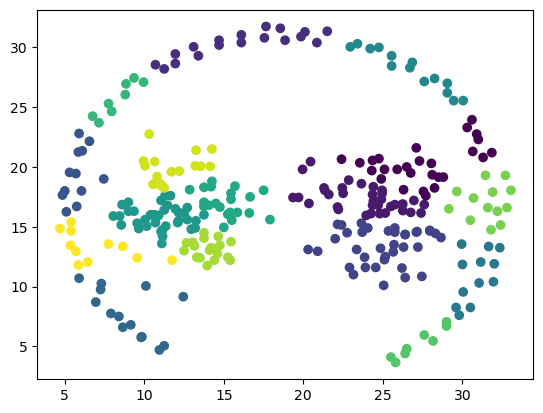

In [27]:
plt.scatter(x = pathbased_arr[:,0], y= pathbased_arr[:,1], c = pred)

# Unbalenced data

In [28]:
unbalance_df = pd.read_csv("./data/unbalance2.txt", sep=" ", header=None)
unbalance_df

,0,1
0,151700,351102
1,155799,354358
2,142857,352716
3,152726,349144
4,151008,349692
...,...,...
6495,218990,412773
6496,213767,393738
6497,226754,394768
6498,221605,396515


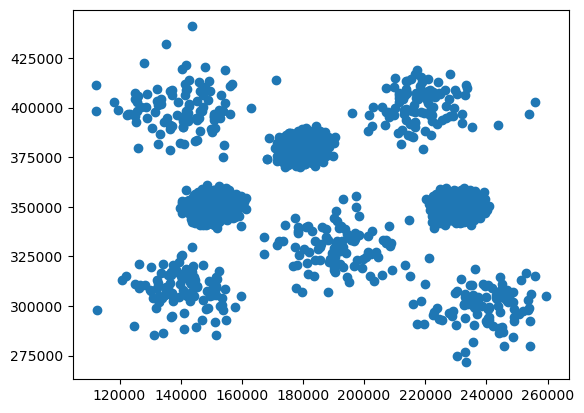

In [29]:
unbalance_arr = unbalance_df.to_numpy()
unbalance_arr_scaled = z_scale_np_array(unbalance_arr)
xs, ys = zip(*unbalance_arr)
plt.scatter(xs, ys)

In [37]:
cluster_sizes = [2,4,6,8]
n_neighbours = [5,6,7,8]
tmp, pred = aggClus_tuning_with_cdbw(unbalance_arr, unbalance_arr_scaled, cluster_sizes ,n_neighbours)
print(tmp)

{'cdbw_score': 3.273207242666783e-05, 'n_cluster': 4, 'linkage': 'single', 'metric': 'euclidean', 'n_neighbours': 5}


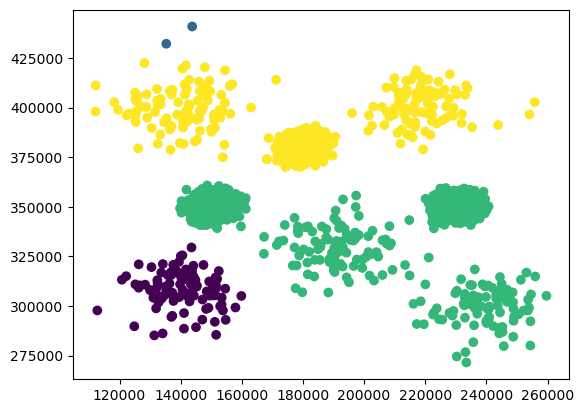

In [38]:
plt.scatter(x = unbalance_arr[:,0], y= unbalance_arr[:,1], c = pred)